## métodos de ensamble

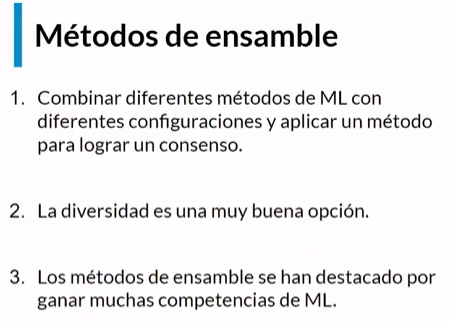

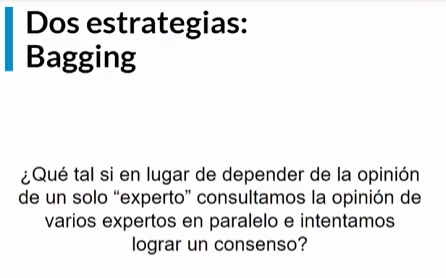

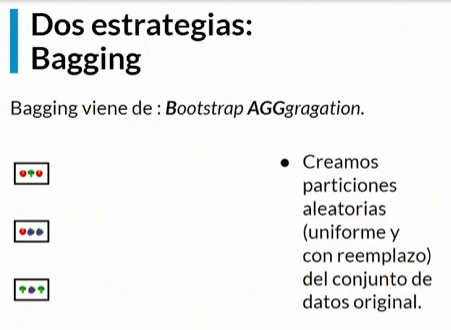

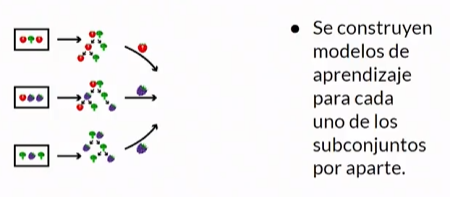

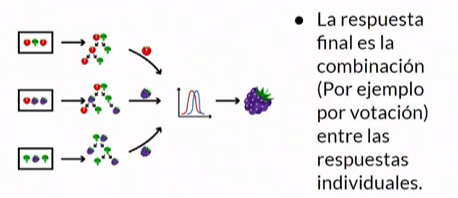

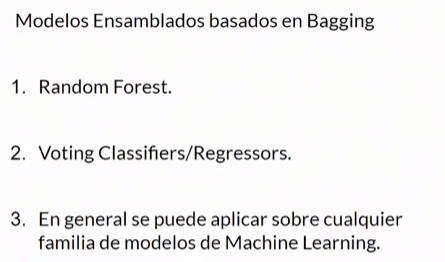

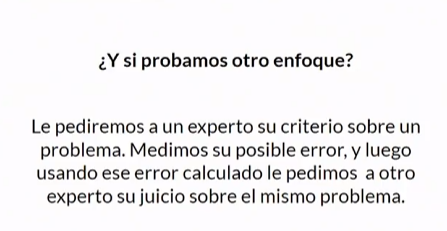

Imagina que estás tratando de tomar una decisión difícil, como qué película ver en una noche de películas. A veces, tomar una decisión por ti mismo puede ser complicado porque las películas son muy diferentes y no estás seguro de cuál elegir. Aquí es donde tus amigos pueden ayudarte.

Ahora, supongamos que tienes varios amigos, cada uno con diferentes gustos en películas. En lugar de preguntarle a un solo amigo, podrías preguntarles a todos tus amigos qué película creen que deberías ver. Luego, podrías hacer una lista de todas las sugerencias de películas que te dieron. Después de hacer esto, podrías contar cuántas veces se menciona cada película en la lista. La película que recibió más menciones probablemente sería una buena opción para ver, ya que muchas personas la recomendaron.

El método de Bagging funciona de manera similar, pero en lugar de amigos y películas, utiliza muchos modelos de aprendizaje automático (como KNeighbors, LinearSVC, SVC, etc.). Cada modelo tiene su propia forma de tomar decisiones, al igual que tus amigos tienen diferentes preferencias.

En lugar de usar un solo modelo para hacer una predicción, el método de Bagging utiliza varios modelos, como si fueran tus amigos, para hacer muchas predicciones. Luego, combina todas estas predicciones para tomar una decisión final. Cada modelo tiene igual importancia en la decisión final, al igual que las opiniones de tus amigos.

Imagina que tienes una pregunta, como "¿Esta película me gustará?". En lugar de preguntarle a un solo amigo, preguntas a todos tus amigos (modelos) y obtienes sus opiniones (predicciones). Luego, usas las opiniones de todos para tomar una decisión final basada en la mayoría. De esta manera, estás aprovechando la sabiduría colectiva de tus amigos (modelos) para hacer una elección mejor y más informada.

En resumen, Bagging es como pedirle a un grupo de amigos con diferentes opiniones que te ayuden a tomar una decisión. Utiliza varios modelos de aprendizaje automático para hacer muchas predicciones y luego combina esas predicciones para obtener una decisión final más precisa y confiable.

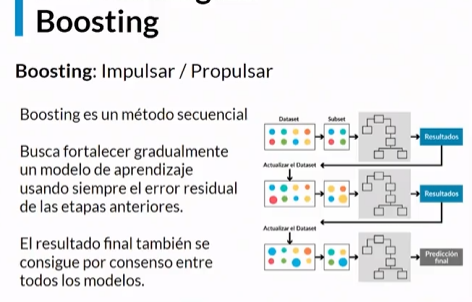

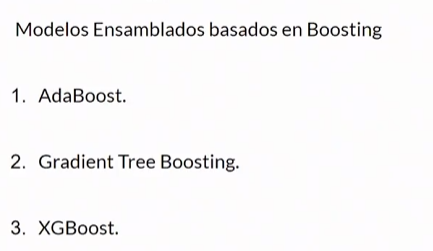

# Diferencias entre bagging y boosting

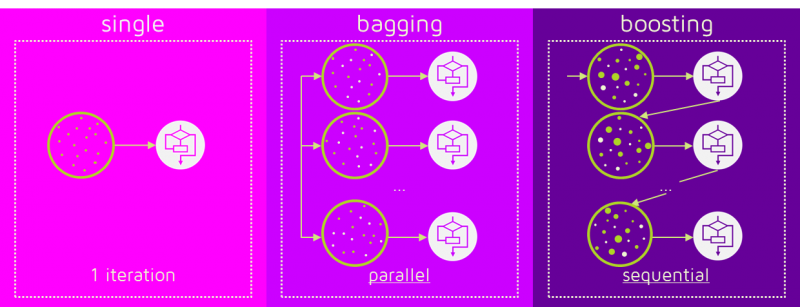

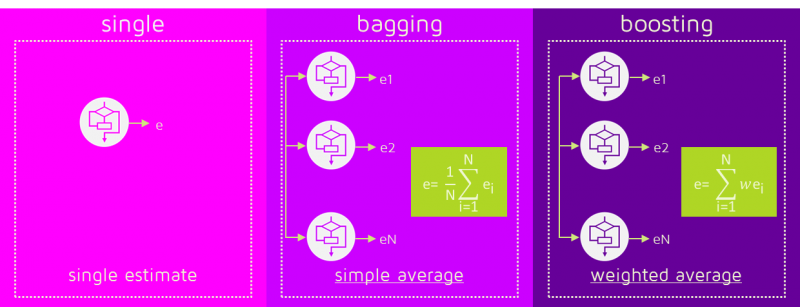

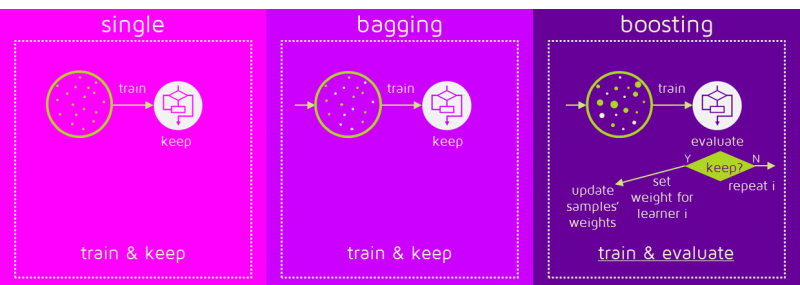

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

# Preparación de datos para implementar métodos de ensamble

In [23]:
import pandas as pd

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [31]:
df_heart = pd.read_csv('/home/roy/Scikitlearn/data/heart.csv')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
X = df_heart.drop(columns=['target'], axis=1) # si implace es false hace una copia del dataset ala variablem, si es true elimina la columna del dataset para la variable
y = df_heart['target']

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=42)

## Implementación de Bagging

In [19]:
# Creamos un modelo KNeighborsClassifier (K-Vecinos más Cercanos) y lo ajustamos (fit) a los datos de entrenamiento
# X_train son los datos de entrenamiento para las características (variables independientes)
# y_train son los datos de entrenamiento para la variable objetivo (variable dependiente)
knn = KNeighborsClassifier().fit(X_train, y_train)

# Utilizamos el modelo KNeighborsClassifier para hacer predicciones sobre los datos de prueba (X_test)
knn_pred = knn.predict(X_test)

# Calculamos y mostramos la precisión (accuracy) de las predicciones usando accuracy_score
print('=' * 30)
print("Precisión del modelo KNeighborsClassifier:", accuracy_score(knn_pred, y_test))

# Creamos un modelo BaggingClassifier usando KNeighborsClassifier como clasificador base, con 50 estimadores (clasificadores base)
bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50).fit(X_train, y_train)

# Utilizamos el modelo BaggingClassifier para hacer predicciones sobre los datos de prueba (X_test)
bag_pred = bag_class.predict(X_test)

# Calculamos y mostramos la precisión (accuracy) de las predicciones usando accuracy_score
print('=' * 30)
print("Precisión del modelo BaggingClassifier:", accuracy_score(bag_pred, y_test))


Precisión del modelo KNeighborsClassifier: 0.6908077994428969
Precisión del modelo BaggingClassifier: 0.724233983286908


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)

print('Accuracy KNeighbors:', accuracy_score(knn_pred, y_test))
print('')

classifiers = {
    'KNeighbors': KNeighborsClassifier(),
    'LinearSCV': LinearSVC(),
    'SVC': SVC(),
    'SGDC': SGDClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

for name, estimator in classifiers.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=5).fit(X_train, y_train)
    bag_pred = bag_class.predict(X_test)
    
    print('Accuracy Bagging with {}:'.format(name), accuracy_score(bag_pred, y_test))
    print('')



Accuracy KNeighbors: 0.6908077994428969

Accuracy Bagging with KNeighbors: 0.7465181058495822

Accuracy Bagging with LinearSCV: 0.7771587743732591

Accuracy Bagging with SVC: 0.6685236768802229

Accuracy Bagging with SGDC: 0.637883008356546

Accuracy Bagging with DecisionTree: 0.9554317548746518



/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `d

## Implementación de Boosting


In [29]:
boost = GradientBoostingClassifier(n_estimators=170).fit(X_train,y_train)
boost_pred = boost.predict(X_test)

print('=' * 30)
print("Precisión del modelo BoostingClassifier:", accuracy_score(boost_pred, y_test))

Precisión del modelo BoostingClassifier: 0.9749303621169917


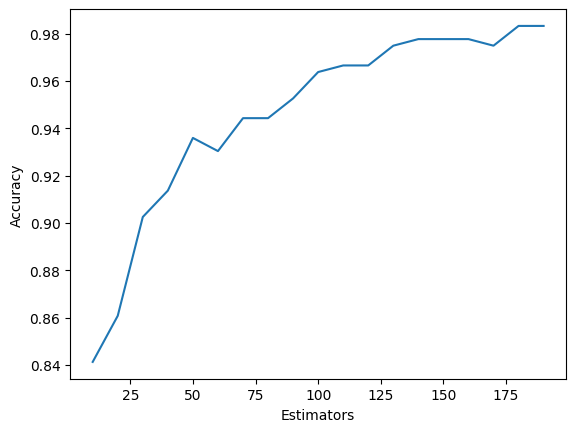

180


<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt # da el numero de estimadores para una mejor accuracy 
import numpy as np

estimators = range(10, 200, 10)
total_accuracy = {}
for i in estimators:
    boost = GradientBoostingClassifier(
        n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy[i] = accuracy_score(y_test, boost_pred)

plt.plot(estimators, total_accuracy.values())
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Boost.png')

max_accu = np.array(list(total_accuracy.values())).max()
best_est_num = {k: v for k, v in total_accuracy.items()
                if v == max_accu}
best_est_num = list(best_est_num)
print(best_est_num[0])